Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
using StatsFuns, Optim, Turing, Flux.Tracker
gr(size=(600,300));

Turing.setadbackend(:reverse_diff)

loaded


┌ Warning: Package Turing does not have CmdStan in its dependencies:
│ - If you have Turing checked out for development and have
│   added CmdStan as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Turing
│ Loading CmdStan into Turing from project dependency, future warnings for Turing are suppressed.
└ @ nothing nothing:840


:reverse_diff

### snippet 2.8t

Define the data

In [2]:
k = 6; n = 9;

Define the model

In [3]:
@model globe_toss(n, k) = begin
  theta ~ Beta(1, 1) # prior
  k ~ Binomial(n, theta) # model
  return k, theta
end;

Compute the "maximum_a_posteriori" value

Set search bounds

In [4]:
lb = [0.0]; ub = [1.0];

Create (compile) the model

In [5]:
model = globe_toss(n, k);

Compute the maximum_a_posteriori

In [6]:
result = maximum_a_posteriori(model, lb, ub)

Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.43601313152405363]
 * Minimizer: [0.6666666665712192]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 7.68e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 9.22e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 3.11e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 49
 * Gradient Calls: 49

Use Turing mcmc

In [7]:
Turing.turnprogress(false)
chn = sample(model, NUTS(2000, 1000, 0.65));

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/Turing.jl:81
┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:246
[NUTS{Union{}}] found initial ϵ: 0.8
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/support/hmc_core.jl:291
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/core/ad.jl:115
┌ Info:  Adapted ϵ = 0.9595407256254531, std = [1.0]; 1000 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/packages/Turing/pRhjG/src/samplers/adapt/adapt.jl:91


[NUTS] Finished with
  Running time        = 5.366160218000005;
  #lf / sample        = 0.0025;
  #evals / sample     = 6.8585;
  pre-cond. metric    = [1.0].


Look at the generated draws (in chn)

In [8]:
describe(chn)

Iterations = 1:2000
Thinning interval = 1
Chains = 1
Samples per chain = 2000

Empirical Posterior Estimates:
             Mean         SD       Naive SE       MCSE         ESS   
  lf_num  0.00250000 0.111803399 0.0025000000 0.0025000000 2000.00000
 elapsed  0.00268308 0.083443804 0.0018658602 0.0024022260 1206.59200
 epsilon  1.11832340 0.967841538 0.0216415947 0.0449674509  463.24632
   theta  0.64178990 0.133473620 0.0029845609 0.0032139864 1724.65731
      lp -3.26836903 0.699385284 0.0156387304 0.0257294314  738.87777
eval_num  6.85850000 3.987910413 0.0891723877 0.1334487384  893.02135
  lf_eps  1.11832340 0.967841538 0.0216415947 0.0449674509  463.24632

Quantiles:
              2.5%          25.0%        50.0%         75.0%          97.5%    
  lf_num  0.0000000000  0.00000000000  0.00000000  0.00000000000  0.00000000000
 elapsed  0.0001327437  0.00013531425  0.00014373  0.00034360475  0.00074923602
 epsilon  0.3871856393  0.95954072563  0.95954073  1.03236201414  2.7270911261

Look at the mean and sd

In [9]:
println("\ntheta = $(mean_and_std(chn[:theta][1001:2000]))\n")


theta = (0.6416312990141793, 0.1311782682540063)



Compute at hpd region

In [10]:
bnds = MCMCChain.hpd(chn[:theta], alpha=0.06);

analytical calculation

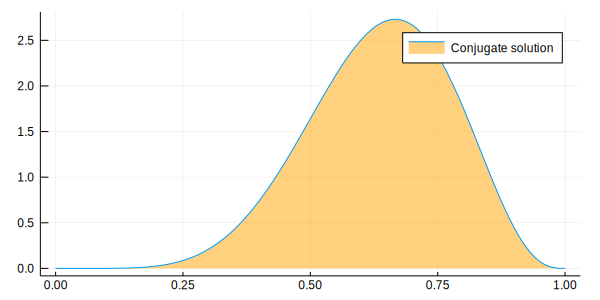

In [11]:
w = 6; n = 9; x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

quadratic approximation

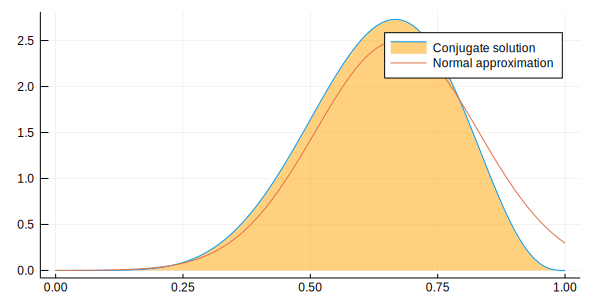

In [12]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

Turing Chain &  89%hpd region boundaries

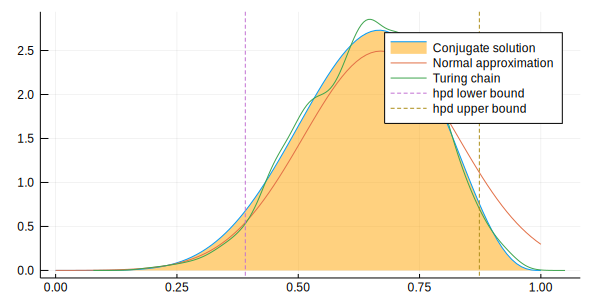

In [13]:
density!(chn[:theta], lab="Turing chain")
vline!([bnds[1]], line=:dash, lab="hpd lower bound")
vline!([bnds[2]], line=:dash, lab="hpd upper bound")

Show hpd region

In [14]:
println("hpd bounds = $bnds\n")

hpd bounds = [0.390912, 0.87325]



End of `clip_08t.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*